# Productionisation of Machine Learning Models (Model Serialization)

# Diamond Price Prediction

## About the Dataset

### This classic dataset contains the prices and other attributes of almost 54,000 diamonds. 



**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**price** in US dollars (\$326--\$18,823)

**Loading Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [2]:
df = pd.read_csv("diamonds_data.csv")

In [3]:
# Printing Top 5 Rows

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Printing Last 5 Rows

df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
# Printing Random 10 Rows

df.sample(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
12394,1.01,Good,E,SI1,64.2,59.0,5232,6.27,6.19,4.00
45285,0.52,Ideal,G,VS1,60.9,56.0,1662,5.20,5.24,3.18
9835,1.01,Premium,D,SI2,60.9,62.0,4672,6.45,6.43,3.92
53792,0.51,Ideal,F,IF,62.5,54.0,2730,5.12,5.16,3.21
33698,0.33,Ideal,G,VVS1,61.1,56.0,838,4.47,4.50,2.74
44266,0.52,Ideal,E,VS2,62.1,56.0,1576,5.17,5.20,3.22
1567,0.73,Ideal,H,VVS1,61.6,57.0,3005,5.81,5.78,3.57
3716,0.82,Ideal,F,VS2,61.9,57.0,3453,5.99,5.96,3.70
15810,1.01,Very Good,G,VS1,62.7,56.0,6326,6.36,6.46,4.02
52522,0.58,Ideal,G,IF,61.3,56.0,2528,5.36,5.39,3.29


## EDA

In [6]:
# Printing Total Number of Rows and Columns

print("Total Number of Rows    : " , df.shape[0])
print("Total Number of Columns : " , df.shape[1])

Total Number of Rows    :  53940
Total Number of Columns :  10


In [7]:
# Printing Null Values

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
# Printing Duplicated Values

df.duplicated().sum()

146

In [9]:
# Dropping Duplicated Values

df.drop_duplicates(inplace=True)

In [10]:
# Printing Duplicated Values Afer Dropping Duplicated Values

df.duplicated().sum()

0

In [11]:
# Printing Total Number of Rows and Columns Afer Dropping Duplicated Values

print("Total Number of Rows    : " , df.shape[0])
print("Total Number of Columns : " , df.shape[1])

Total Number of Rows    :  53794
Total Number of Columns :  10


In [12]:
# PRinting Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [13]:
# Printing Dataset Statistical Information

df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [14]:
# Printing Columns Name 

df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Data Preprocessing 

In [15]:
df.carat.unique()

array([0.23, 0.21, 0.29, 0.31, 0.24, 0.26, 0.22, 0.3 , 0.2 , 0.32, 0.33,
       0.25, 0.35, 0.42, 0.28, 0.38, 0.7 , 0.86, 0.71, 0.78, 0.96, 0.73,
       0.8 , 0.75, 0.74, 0.81, 0.59, 0.9 , 0.91, 0.61, 0.77, 0.63, 0.76,
       0.64, 0.72, 0.79, 0.58, 1.17, 0.6 , 0.83, 0.54, 0.98, 0.52, 1.01,
       0.53, 0.84, 0.51, 1.05, 0.55, 0.87, 1.  , 0.57, 0.82, 1.04, 0.93,
       1.2 , 0.99, 0.34, 0.43, 0.36, 0.95, 0.89, 1.02, 0.97, 0.56, 0.85,
       0.92, 1.27, 0.66, 1.12, 0.68, 1.03, 0.62, 1.22, 1.08, 0.88, 0.5 ,
       1.19, 0.39, 0.65, 1.24, 1.5 , 0.27, 0.41, 1.13, 1.06, 0.69, 0.4 ,
       1.14, 0.94, 1.29, 1.52, 1.16, 1.21, 1.23, 1.09, 0.67, 1.11, 1.1 ,
       1.18, 1.15, 1.25, 1.07, 1.28, 1.51, 0.37, 1.31, 1.26, 1.39, 1.44,
       1.35, 1.3 , 1.32, 1.41, 1.36, 1.45, 1.34, 1.58, 1.54, 1.38, 1.33,
       1.74, 1.64, 1.47, 1.4 , 1.55, 1.95, 2.  , 1.37, 1.83, 1.62, 1.57,
       1.69, 2.06, 1.72, 1.66, 2.14, 1.49, 1.46, 2.15, 1.96, 2.22, 1.7 ,
       1.53, 1.85, 2.01, 2.27, 1.68, 1.56, 1.81, 1.

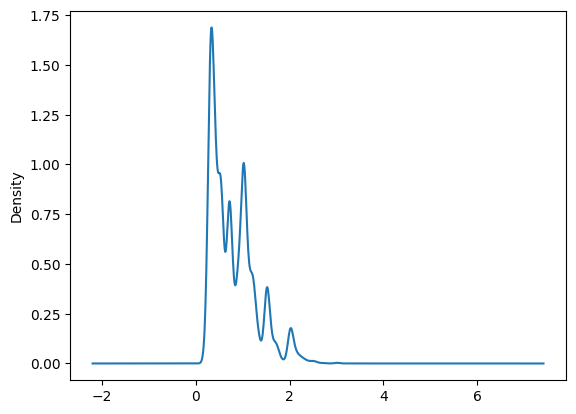

In [16]:
df.carat.plot(kind='kde')
plt.show()

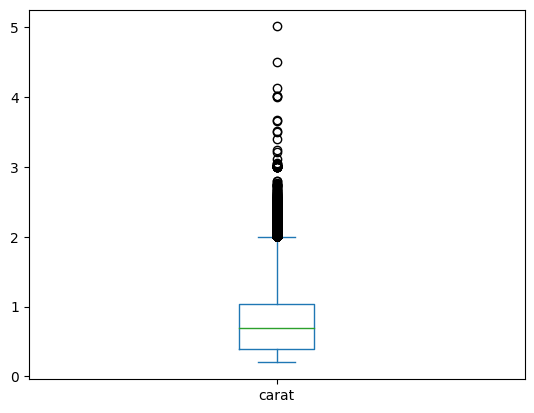

In [17]:
df.carat.plot(kind='box')
plt.show()

**cut column**

In [18]:
df.cut.value_counts()

Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: cut, dtype: int64

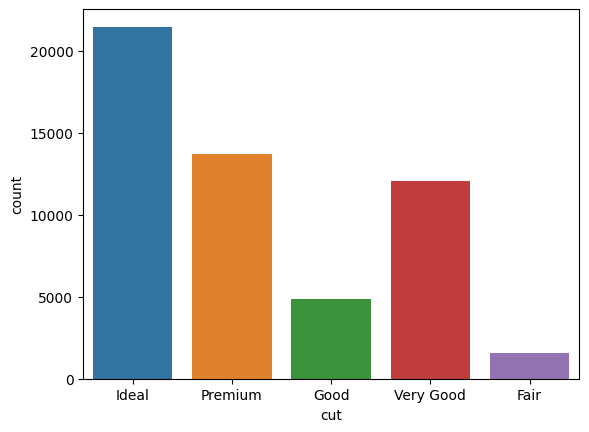

In [19]:
sns.countplot(x=df.cut)
plt.show()

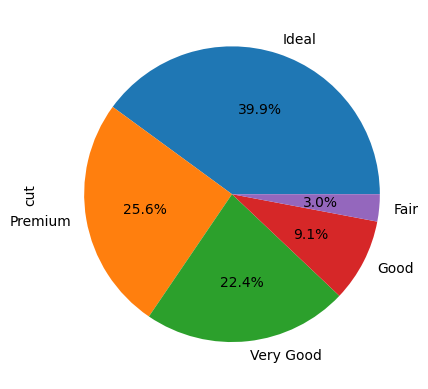

In [20]:
df.cut.value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

**color column**

In [21]:
df.color.value_counts()

G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: color, dtype: int64

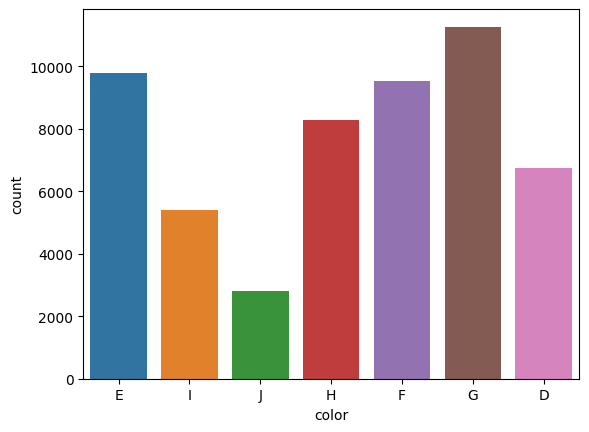

In [22]:
sns.countplot(x=df.color)
plt.show()

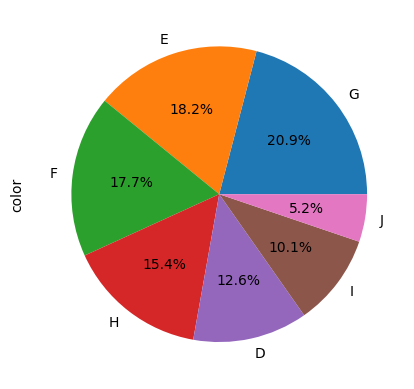

In [23]:
df.color.value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.show()

**clarity**

In [24]:
df.clarity.value_counts()

SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: clarity, dtype: int64

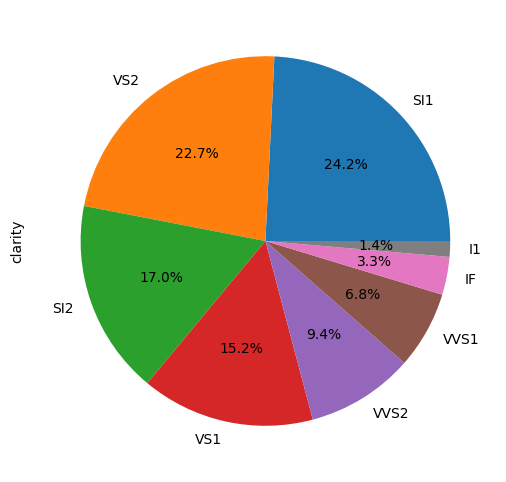

In [25]:
df.clarity.value_counts().plot(kind='pie', autopct="%1.1f%%",figsize=(9,6))
plt.show()

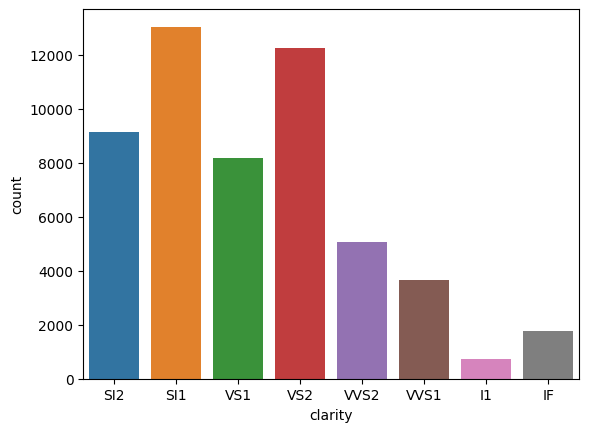

In [26]:
sns.countplot(x=df.clarity)
plt.show()

**depth column**

In [27]:
df.depth.unique()

array([61.5, 59.8, 56.9, 62.4, 63.3, 62.8, 62.3, 61.9, 65.1, 59.4, 64. ,
       60.4, 62.2, 60.2, 60.9, 62. , 63.4, 63.8, 62.7, 61. , 58.1, 62.5,
       60.5, 60. , 60.7, 59.5, 58.2, 64.1, 60.8, 61.8, 61.2, 61.1, 65.2,
       58.4, 63.1, 61.6, 59.3, 62.6, 63. , 63.2, 62.1, 61.4, 62.9, 63.7,
       59.2, 59.9, 57.9, 55.1, 57.5, 66.3, 61.7, 58.8, 64.5, 65.3, 59.6,
       64.4, 65.7, 63.6, 61.3, 60.1, 60.3, 58. , 64.6, 59.7, 57.8, 67.9,
       60.6, 57.2, 64.2, 65.8, 67.4, 59. , 63.5, 67.3, 58.7, 66.4, 68.1,
       63.9, 55. , 58.6, 64.3, 58.5, 65. , 56. , 58.3, 53.1, 64.9, 59.1,
       58.9, 66.7, 57.7, 65.4, 53.3, 53. , 67.8, 66.1, 55.8, 67.6, 68.2,
       65.5, 67.7, 69.5, 56.6, 56.3, 66.9, 66. , 67. , 57.6, 67.1, 65.6,
       64.8, 69.3, 66.2, 55.4, 66.8, 64.7, 66.6, 55.9, 57.3, 57.4, 68.3,
       68.5, 56.2, 65.9, 56.5, 56.1, 66.5, 68.4, 69.7, 57.1, 68.7, 56.7,
       68.6, 71.6, 43. , 68.8, 67.5, 69. , 55.2, 68.9, 69.6, 57. , 56.4,
       56.8, 44. , 67.2, 70.1, 71.3, 70.6, 69.8, 71

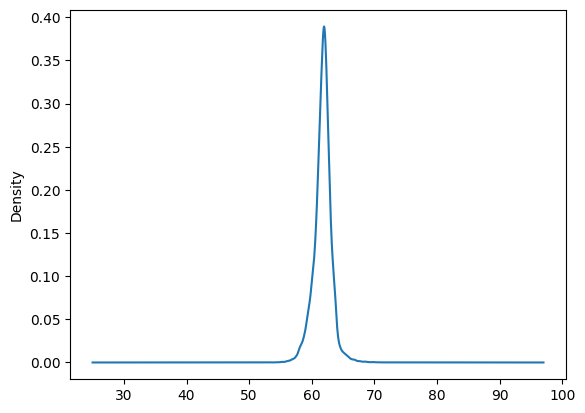

In [28]:
df.depth.plot(kind='kde')
plt.show()

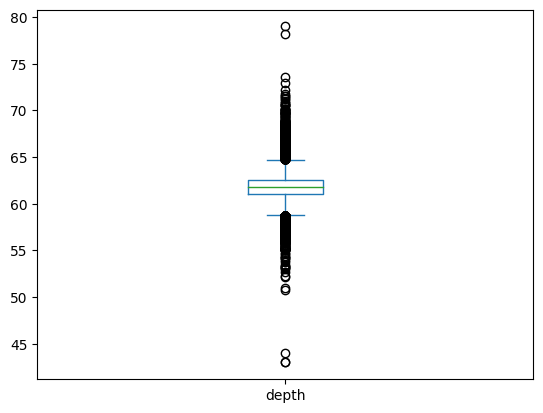

In [29]:
df.depth.plot(kind='box')
plt.show()

**table column**

In [30]:
df.table.unique()

array([55. , 61. , 65. , 58. , 57. , 56. , 54. , 62. , 59. , 63. , 60. ,
       55.3, 69. , 53. , 64. , 56.4, 60.5, 67. , 52. , 55.8, 66. , 70. ,
       68. , 54.4, 57.1, 53.6, 54.8, 54.2, 54.9, 56.7, 53.9, 57.8, 54.1,
       55.1, 51. , 58.1, 56.9, 56.5, 53.7, 60.7, 56.2, 56.6, 56.1, 56.3,
       57.2, 57.5, 60.9, 59.8, 62.3, 60.1, 55.9, 50.1, 62.2, 54.5, 55.7,
       53.4, 54.7, 58.8, 59.4, 62.5, 54.3, 60.6, 55.2, 58.6, 49. , 50. ,
       54.6, 62.6, 57.7, 56.8, 57.9, 60.3, 55.6, 59.5, 57.4, 62.4, 60.4,
       53.3, 60.2, 60.8, 58.5, 57.6, 43. , 59.9, 63.5, 57.3, 61.4, 58.3,
       55.4, 58.2, 53.5, 59.7, 55.5, 58.7, 53.8, 59.1, 53.2, 59.3, 61.1,
       51.6, 95. , 61.2, 59.2, 58.4, 53.1, 52.8, 44. , 61.3, 61.9, 61.8,
       59.6, 61.5, 58.9, 64.3, 62.8, 71. , 52.4, 63.3, 61.7, 64.2, 73. ,
       65.4, 63.4, 62.1, 79. , 76. , 61.6])

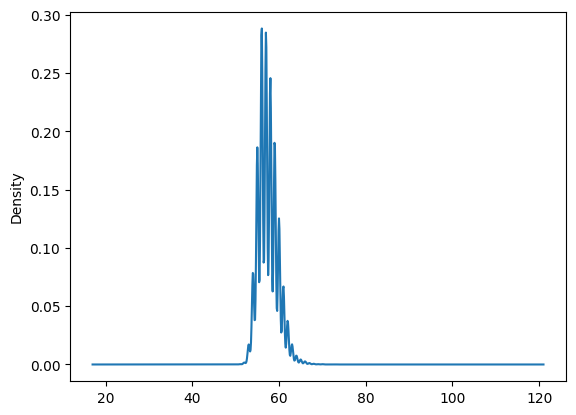

In [31]:
df.table.plot(kind='kde')
plt.show()

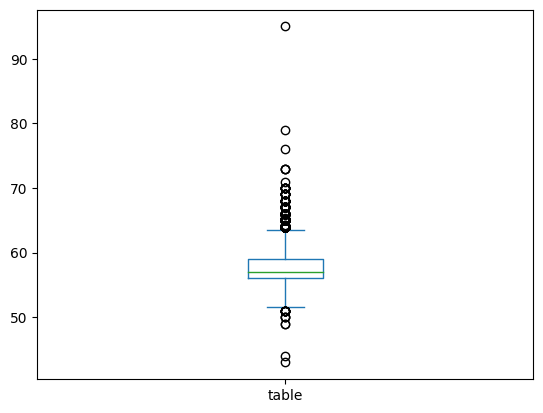

In [32]:
df.table.plot(kind='box')
plt.show()

**x column**

In [33]:
df.x.unique()

array([ 3.95,  3.89,  4.05,  4.2 ,  4.34,  3.94,  4.07,  3.87,  4.  ,
        4.25,  3.93,  3.88,  4.35,  3.79,  4.38,  4.31,  4.23,  4.21,
        4.26,  3.85,  4.39,  4.44,  3.97,  4.28,  3.96,  4.04,  4.01,
        3.92,  4.06,  3.83,  4.29,  4.13,  4.49,  3.99,  4.19,  4.24,
        4.36,  4.33,  4.02,  4.45,  3.91,  4.3 ,  4.43,  4.54,  4.78,
        4.15,  4.08,  4.03,  4.65,  4.22,  5.7 ,  6.45,  5.68,  5.81,
        5.85,  5.71,  6.27,  5.77,  5.97,  5.8 ,  6.  ,  5.94,  5.87,
        5.9 ,  6.14,  5.38,  5.96,  6.16,  5.73,  5.98,  5.72,  6.01,
        5.64,  5.57,  5.63,  5.65,  6.09,  5.56,  6.11,  6.03,  5.89,
        5.69,  5.62,  5.88,  5.52,  5.74,  5.53,  5.78,  5.83,  5.66,
        5.82,  5.79,  5.92,  5.39,  5.33,  6.83,  5.41,  5.25,  5.24,
        5.67,  5.61,  5.76,  6.05,  5.6 ,  5.19,  5.84,  6.39,  5.34,
        5.14,  5.11,  5.54,  6.07,  6.29,  6.31,  6.49,  5.28,  5.48,
        5.55,  6.41,  6.02,  5.91,  6.17,  6.61,  5.12,  6.19,  5.43,
        5.99,  5.95,

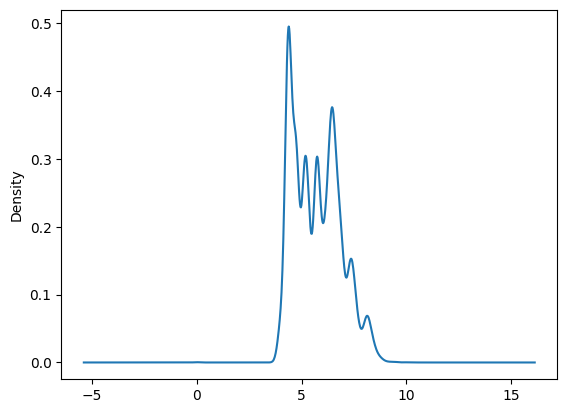

In [34]:
df.x.plot(kind='kde')
plt.show()

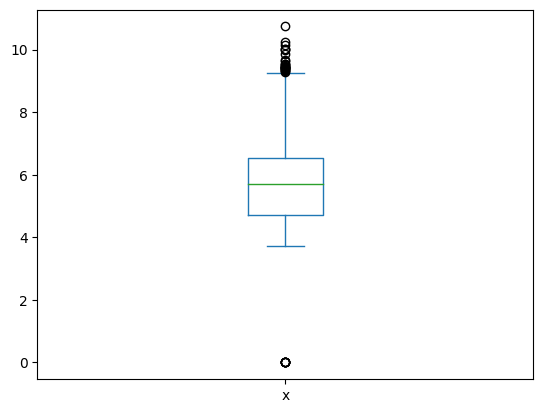

In [35]:
df.x.plot(kind='box')
plt.show()

**y column**

In [36]:
df.y.unique()

array([ 3.98,  3.84,  4.07,  4.23,  4.35,  3.96,  4.11,  3.78,  4.05,
        4.28,  3.9 ,  4.37,  3.75,  4.42,  4.34,  4.29,  4.26,  4.27,
        4.3 ,  3.92,  4.43,  4.47,  4.01,  3.94,  3.97,  3.99,  4.03,
        4.06,  4.08,  3.85,  4.31,  4.16,  4.51,  4.5 ,  4.55,  4.02,
        4.24,  4.38,  3.95,  4.48,  3.89,  3.88,  4.33,  4.32,  4.59,
        4.84,  4.22,  4.  ,  4.25,  4.13,  4.09,  4.04,  4.12,  4.67,
        5.72,  6.33,  5.67,  5.73,  5.85,  5.9 ,  5.76,  5.95,  5.78,
        5.93,  5.75,  5.96,  5.79,  5.87,  5.8 ,  5.81,  6.11,  5.43,
        6.  ,  5.84,  6.12,  5.82,  5.74,  5.94,  6.07,  5.69,  5.83,
        5.61,  5.53,  5.58,  5.59,  5.97,  6.09,  5.99,  5.86,  5.68,
        5.65,  5.55,  5.77,  5.91,  5.56,  5.89,  5.92,  6.03,  5.44,
        5.37,  5.88,  6.9 ,  5.62,  5.27,  5.26,  5.7 ,  5.64,  5.63,
        5.71,  5.51,  5.22,  6.36,  5.54,  5.66,  6.2 ,  5.18,  5.15,
        6.1 ,  6.21,  6.22,  6.45,  6.01,  5.3 ,  5.41,  5.52,  6.27,
        6.05,  6.06,

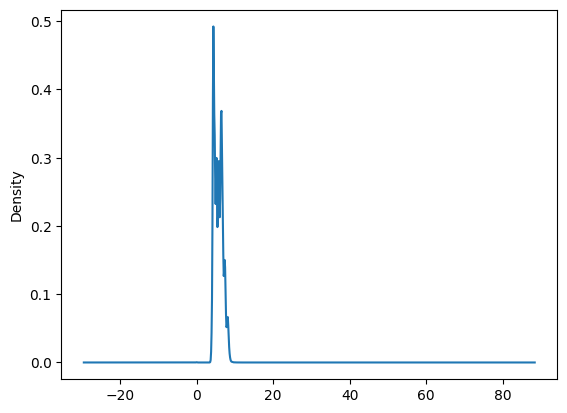

In [37]:
df.y.plot(kind='kde')
plt.show()

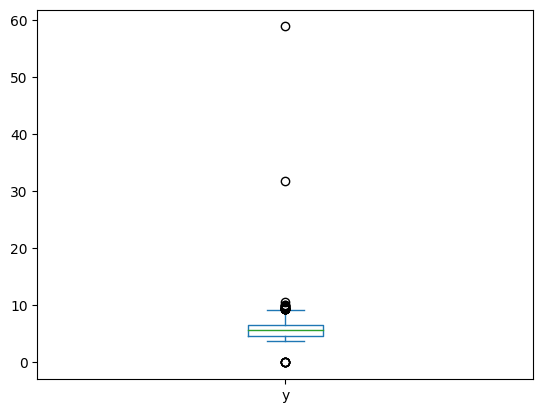

In [38]:
df.y.plot(kind='box')
plt.show()

**z column**

In [39]:
df.z.unique()

array([ 2.43,  2.31,  2.63,  2.75,  2.48,  2.47,  2.53,  2.49,  2.39,
        2.73,  2.46,  2.33,  2.71,  2.27,  2.68,  2.7 ,  2.66,  2.41,
        2.62,  2.59,  2.67,  2.4 ,  2.42,  2.44,  2.37,  2.52,  2.78,
        2.76,  2.61,  2.65,  2.79,  2.54,  2.64,  2.45,  2.72,  2.69,
        2.96,  2.58,  2.51,  2.56,  2.55,  2.87,  3.57,  3.52,  3.5 ,
        3.56,  3.72,  3.38,  3.4 ,  4.07,  3.66,  3.65,  3.58,  3.59,
        3.63,  3.69,  3.61,  3.6 ,  3.35,  3.67,  3.62,  3.87,  3.68,
        3.49,  3.47,  3.46,  3.7 ,  3.32,  3.93,  3.95,  3.64,  3.53,
        3.37,  3.43,  3.51,  3.54,  3.48,  3.55,  3.33,  3.3 ,  4.13,
        3.79,  3.24,  3.23,  4.08,  3.19,  3.94,  3.08,  3.31,  3.21,
        3.75,  3.18,  3.41,  4.03,  4.09,  3.22,  4.18,  3.76,  3.83,
        3.17,  3.44,  3.74,  3.8 ,  3.39,  3.88,  4.  ,  3.98,  3.85,
        3.96,  3.16,  3.78,  3.84,  4.33,  4.01,  3.45,  2.74,  2.95,
        2.8 ,  2.77,  2.9 ,  2.82,  3.77,  3.9 ,  3.73,  3.34,  3.86,
        3.89,  3.81,

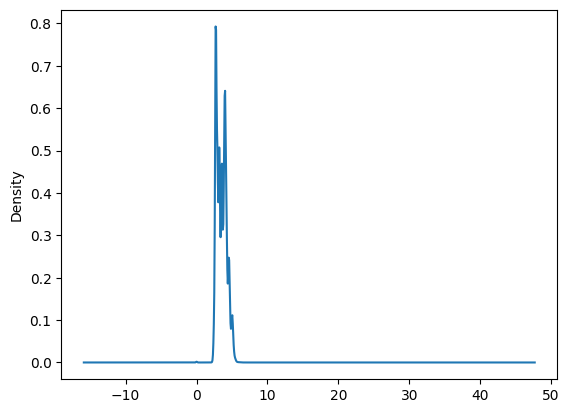

In [40]:
df.z.plot(kind='kde')
plt.show()

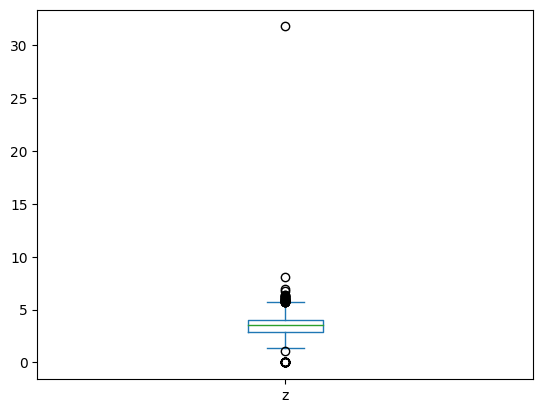

In [41]:
df.z.plot(kind='box')
plt.show()

**price column**

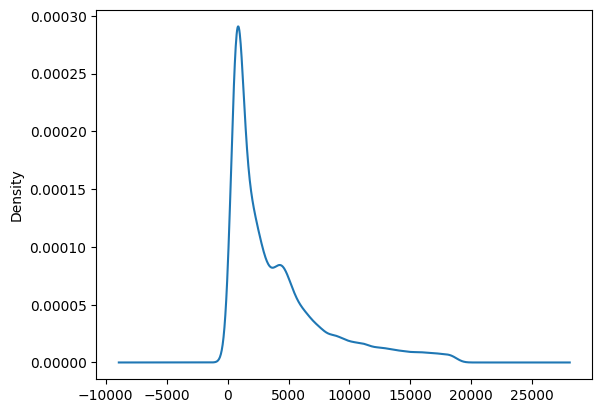

In [42]:
df.price.plot(kind='kde')
plt.show()

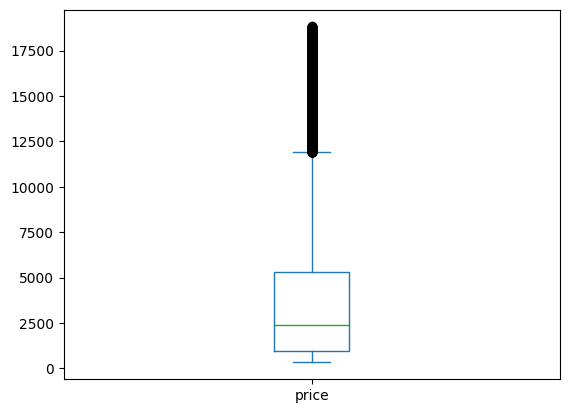

In [43]:
df.price.plot(kind='box')
plt.show()

In [44]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Model Building

Model building refers to the process of creating a mathematical or computational representation of a system or phenomenon. This representation, known as a model, is used to simulate, predict, or analyze the behavior of the system or phenomenon under different conditions. The process of building a model typically involves defining the problem, collecting and preprocessing data, selecting an appropriate algorithm or approach, training and validating the model, and deploying it for use. The quality and accuracy of the model depends on various factors such as the quality and quantity of data, the choice of algorithm, and the skill of the model builder.

In [45]:
X = df.drop('price', axis=1)

In [46]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [47]:
y = df.price

In [48]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53794, dtype: int64

## Train Test Split

Train-test split is a common technique used in machine learning to evaluate the performance of a model. It involves splitting the dataset into two separate parts: the training set and the testing set. The training set is used to train the model, and the testing set is used to evaluate its performance on unseen data. By evaluating the performance of the model on the testing set, we can estimate how well the model will generalize to new data. The most common split ratio is 80:20, where 80% of the data is used for training, and 20% is used for testing. However, this ratio can be adjusted based on the size and complexity of the dataset.

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

In [50]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z
10174,1.00,Premium,H,VS1,59.1,60.0,6.45,6.42,3.80
46754,0.57,Ideal,H,VS1,60.9,56.0,5.34,5.36,3.26
33531,0.35,Ideal,D,VS2,61.9,55.0,4.50,4.54,2.80
27055,0.28,Premium,H,VVS1,59.9,62.0,4.28,4.23,2.55
50182,0.64,Good,F,VS1,57.7,61.0,5.68,5.75,3.29
...,...,...,...,...,...,...,...,...,...
49239,0.58,Good,F,VS1,62.2,62.0,5.37,5.44,3.36
1764,0.75,Ideal,E,SI1,60.8,56.0,5.91,5.89,3.59
16907,1.50,Premium,J,SI2,61.4,61.0,7.36,7.30,4.50
34973,0.23,Very Good,D,VVS1,60.5,55.0,4.01,4.02,2.43


In [51]:
X_test

,carat,cut,color,clarity,depth,table,x,y,z
45001,0.57,Ideal,F,VS2,62.1,55.0,5.31,5.35,3.31
4106,0.78,Ideal,F,VS1,61.6,56.0,5.90,5.92,3.64
40712,0.53,Premium,H,SI1,61.2,60.0,5.22,5.10,3.16
18187,1.20,Ideal,G,SI1,61.6,57.0,6.85,6.88,4.23
2331,0.92,Ideal,J,SI1,62.3,56.0,6.24,6.29,3.90
...,...,...,...,...,...,...,...,...,...
18826,1.30,Premium,H,VS1,61.5,58.0,6.96,6.98,4.29
53509,0.70,Premium,F,VS2,62.4,59.0,5.68,5.64,3.53
44626,0.57,Premium,G,VS2,59.7,59.0,5.37,5.41,3.22
36294,0.34,Very Good,I,VS2,62.1,57.0,4.44,4.48,2.77


In [52]:
print("X_train Shape is : ", X_train.shape)
print("X_test Shape is : ", X_test.shape)
print("y_train Shape is : ", y_train.shape)
print("y_test Shape is : ", y_test.shape)

X_train Shape is :  (43035, 9)
X_test Shape is :  (10759, 9)
y_train Shape is :  (43035,)
y_test Shape is :  (10759,)


In [53]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn import metrics

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Column Transformer

Column Transformer is a tool in scikit-learn library that allows you to apply different transformers to different columns or subsets of columns in a dataset. It is particularly useful when you have mixed data types, such as numerical and categorical features, and need to apply different preprocessing steps to each type. With Column Transformer, you can define a transformer pipeline for each subset of columns and apply them all at once. This can simplify your preprocessing code and make it easier to apply the same transformations to new data.

In [55]:
# define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(sparse=False, drop='first'), [1, 2, 3])
    ],
    remainder='passthrough'
)

## One Hot Encoder

One Hot Encoder is a technique used for converting categorical data into numerical data that can be used by machine learning algorithms. It creates a binary column for each category in the categorical feature, where a value of 1 is assigned to the corresponding category, and 0 for all other categories. This ensures that the categorical data can be used in machine learning algorithms that require numerical data, while preserving the information about the categories. One Hot Encoding can be applied to both nominal and ordinal categorical variables.

In [56]:
# fit the column transformer on the training data and transform it

X_train = ct.fit_transform(X_train)

# transform the test data using the fitted column transformer

X_test = ct.transform(X_test)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Robust Scaler

Robust Scaler is a data preprocessing technique used to scale numerical data in a way that is robust to outliers. It scales the data by subtracting the median and then dividing by the interquartile range (IQR) of each feature. It works by calculating the median and IQR of each feature and then scaling the feature values by subtracting the median and dividing by the IQR. This helps in reducing the impact of outliers on the scaling process, making it more reliable for datasets with extreme values.

In [57]:
scaler = RobustScaler()

# fit the column transformer on the training data and transform it

X_train = scaler.fit_transform(X_train)

# transform the test data using the fitted column transformer

X_test = scaler.transform(X_test)

# MLflow

MLflow is an open source platform for managing the end-to-end machine learning lifecycle. It provides a set of tools and APIs for tracking experiments, packaging code into reproducible runs, and sharing and deploying models.

MLflow allows data scientists to easily track and compare experiments, so they can see how different model architectures, hyperparameters, and datasets perform. It also provides a model registry for storing and versioning trained models, and a deployment API for serving models in real-time.

MLflow is designed to be language-agnostic, so it can be used with a wide range of machine learning frameworks and libraries, including TensorFlow, PyTorch, Scikit-learn, and more. It is a popular tool in industry and academia for managing the machine learning workflow, making it easier to develop, test, and deploy machine learning models.






## Introduction to Experiment Tracking
**Terminologies:**
> 1. Experiment  
> 2. Run  
> 3. Metadata  (i.e. Tags, Parameters, Metrics)  
> 4. Artifacts (i.e. Output files associated with experiment runs)

**What do you want to track for each Experiment Run?**
1. Training and Validation Data Used
2. Hyperparameters
3. Metrics
4. Models

**Why Track?**
> Organization
> Optimization
> Reproducibility

**Tool - MLFlow**  
MLFlow helps you to organize your experiments into runs.

**MLFlow keeps track of:**
> Tags  
> Parameters  
> Metrics  
> Models  
> Artifact  
> Source code, Start and End Time, Authors etc..

**Run below mentioned commands to install mlflow on your system:**
```
pip install mlflow
mlflow ui --backend-store-uri sqlite:///mlflow.db
```

## Introduction to MLFlow

**Step 1 - Import MLFlow**
> `import mlflow`

**Step 2 - Set the tracker and experiment**
> `mlflow.set_tracking_uri(DATABASE_URI)`  
> `mlflow.set_experiment("EXPERIMENT_NAME")`

**Step 3 - Start a experiment run**
> `with mlflow.start_run():`

**Step 4 - Logging the metadata**
> `mlflow.set_tag(KEY, VALUE)`  
> `mlflow.log_param(KEY, VALUE)`
> `mlflow.log_metric(KEY, VALUE)`

**Step 5 - Logging the model and other files (2 ways)**
> **Way 1 -** `mlflow.<FRAMEWORK>.log_model(MODEL_OBJECT, artifact_path="PATH")`  
> **Way 2 -** `mlflow.log_artifact(LOCAL_PATH, artifact_path="PATH")`

## Running the Experiment

In [58]:
import mlflow

In [59]:
# mlflow.set_tracking_uri("sqlite:///mlflow.db")

mlflow.set_experiment("Diamond Price Prediction")

2023/05/08 07:33:13 INFO mlflow.tracking.fluent: Experiment with name 'Diamond Price Prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///D:/Projects/Experiment%20Tracking%20with%20MLFlow/mlruns/979578538362533886', creation_time=1683511393008, experiment_id='979578538362533886', last_update_time=1683511393008, lifecycle_stage='active', name='Diamond Price Prediction', tags={}>

In [60]:
from pickle import dump

dump(scaler, open('models/standard_scaler.pkl', 'wb'))

## Experiment 1 - Training Linear Regression

**Linear Regression**

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes that the relationship between the variables is linear, which means that a change in one variable is associated with a proportional change in the other variable. The goal of linear regression is to find the best-fit line that minimizes the difference between the predicted values and the actual values of the dependent variable. This line can be used to predict the value of the dependent variable for new values of the independent variable. Linear regression can be used for both simple and multiple regression, and it is widely used in various fields such as economics, finance, and social sciences.

In [61]:
# Start MLflow experiment
with mlflow.start_run(run_name="Linear Regression"):
    
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Linear Regression")

    # Train model
    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Make predictions
    y_pred = lr.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("alpha", 0.5)
    mlflow.log_param("l1_ratio", 0.1)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(lr, "model")
    
    mlflow.sklearn.log_model(lr, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 2 - Training Ridge Regression

**Ridge Regression**

Ridge Regression is a regularized linear regression technique that aims to address the issue of overfitting in high-dimensional data. It adds a penalty term to the cost function that is proportional to the sum of the squared values of the regression coefficients. This penalty term shrinks the coefficients towards zero and reduces their variance, which helps to prevent overfitting. The amount of regularization is controlled by a hyperparameter called the regularization parameter or lambda, which needs to be chosen carefully based on the data. Ridge Regression is particularly useful when there is multicollinearity among the predictor variables, as it can help to stabilize the coefficients and make them more interpretable.

In [62]:
# Start MLflow experiment
with mlflow.start_run(run_name="Ridge Regression"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Ridge Regression")

    # Train model
    ridge = Ridge(alpha=10)
    ridge.fit(X_train, y_train)

    # Make predictions
    y_pred = ridge.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("alpha", 10)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(ridge, "model")
    
    mlflow.sklearn.log_model(ridge, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 3 - Training Lasso Regression

**Lasso Regression**

Lasso Regression is a type of linear regression that performs both variable selection and regularization to prevent overfitting. It uses a penalty term called L1 regularization to shrink the coefficients of less important features towards zero, effectively dropping them from the model. This results in a simpler and more interpretable model that can generalize better to new data. Lasso Regression is particularly useful in cases where there are many features and only a subset of them are expected to be important in predicting the outcome variable.

In [63]:
# Start MLflow experiment
with mlflow.start_run(run_name="Lasso Regression"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Lasso Regression")

    # Train model
    lasso = Lasso(alpha=0.001)
    lasso.fit(X_train, y_train)

    # Make predictions
    y_pred = lasso.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("alpha", 0.001)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(lasso, "model")
    
    mlflow.sklearn.log_model(lasso, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 4 - Training Random Forest Regression

**Random Forest**

Random forest regression is a machine learning algorithm that combines multiple decision trees to create a more robust and accurate model for regression analysis. It works by generating a large number of decision trees, each of which is trained on a random subset of the data and a random subset of the input features. The predictions from each tree are then combined to create an overall prediction for the model. This approach helps to reduce overfitting and improve the accuracy of the model by reducing the variance in the predictions. Random forest regression can be applied to a wide range of regression problems, including predicting numeric values, such as stock prices or home values, and estimating continuous variables, such as customer lifetime value or energy consumption.

In [64]:
from sklearn.ensemble import RandomForestRegressor
import mlflow

# Start MLflow experiment
with mlflow.start_run(run_name="Random Forest"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Random Forest")

    # Train model
    rf = RandomForestRegressor(n_estimators=155,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
    rf.fit(X_train, y_train)

    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[1] - 1))
    
    # Log model parameters and metrics to MLflow
    mlflow.log_param("n_estimators", 155)
    mlflow.log_param("max_depth", 15)
    mlflow.log_param("random_state", 3)
    mlflow.log_param("max_samples", 0.5)
    mlflow.log_param("max_features", 0.75)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(rf, "model")
    
    mlflow.sklearn.log_model(rf, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

**SVM (Support Vector Machine)**

Support Vector Machine (SVM) Regression is a supervised machine learning algorithm used for regression analysis. It finds the best possible line or hyperplane that fits and generalizes well on the given data by identifying support vectors closest to the data points in the feature space. The choice of kernel function is crucial for its accuracy and performance. It can handle non-linear data and is used in applications such as financial forecasting, stock market analysis, and medical diagnosis.

In [65]:
# svr = SVR(kernel='rbf',C=1000,epsilon=0.1)

# svr.fit(X_train,y_train)

# y_pred = svr.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

### SVM Taking too much time to execute it 

## Experiment 5 - Training Decision Tree Regression

**Decision Tree**

A decision tree is a type of machine learning algorithm used for classification and regression analysis. It involves creating a tree-like model of decisions and their possible consequences. The tree is constructed by recursively splitting the data into smaller subsets, based on the features that best separate the data. Each internal node of the tree represents a decision based on a feature, and each leaf node represents a predicted outcome. Decision trees are simple to understand and interpret, and can handle both categorical and numerical data. However, they are prone to overfitting and may not perform well on datasets with complex relationships between variables.

In [66]:
# Start MLflow experiment
with mlflow.start_run(run_name="Decision Tree"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Decision Tree")

    # Train model
    dt = DecisionTreeRegressor(max_depth=8)
    dt.fit(X_train, y_train)

    # Make predictions
    y_pred = dt.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("max_depth", 8)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(dt, "model")
    
    mlflow.sklearn.log_model(dt, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 6 - Training K-Nearest Neighbors (KNN) Regression

**KNN**

K-Nearest Neighbors (KNN) is a simple and widely used algorithm for classification and regression tasks in machine learning. The basic idea behind KNN is to find the K closest data points in the training set to a new, unlabeled data point and use the labels of those K neighbors to predict the label of the new data point. KNN can be used for both binary and multi-class classification, as well as regression tasks. One of the main advantages of KNN is its simplicity and ease of implementation, but it can become computationally expensive for large datasets.

In [67]:
from sklearn.neighbors import KNeighborsRegressor
import mlflow

# Start MLflow experiment
with mlflow.start_run(run_name="KNN"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "KNN")

    # Train model
    knn = KNeighborsRegressor(n_neighbors=3)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("n_neighbors", 3)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(knn, "model")
    
    mlflow.sklearn.log_model(knn, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 7 - Training Gradient Boost Regression

**Gradient Boost**

Gradient Boosting is a machine learning algorithm that combines multiple weak models, usually decision trees, to create a strong predictive model. The algorithm works by iteratively fitting new models to the residuals of the previous model, with each new model being trained to correct the errors of the previous model. Gradient Boosting is effective for a wide range of prediction problems, including classification and regression tasks, and has been used to win several machine learning competitions.

In [68]:
# Start MLflow experiment
with mlflow.start_run(run_name="Gradient Boosting"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "Gradient Boosting")

    # Train model
    gb = GradientBoostingRegressor(n_estimators=500, max_depth=8)
    gb.fit(X_train, y_train)

    # Make predictions
    y_pred = gb.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("n_estimators", 500)
    mlflow.log_param("max_depth", 8)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(gb, "model")
    
    mlflow.sklearn.log_model(gb, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 8 - Training XGBoost (Extreme Gradient Boosting) Regression

**XGBoost**

XGBoost (Extreme Gradient Boosting) is a popular and powerful machine learning algorithm that is designed to be highly efficient and scalable. It is an optimized implementation of the gradient boosting algorithm that builds upon the basic algorithm by adding a number of key optimizations, such as parallel tree construction, hardware optimization, and regularization.

XGBoost is particularly well-suited for solving large-scale, high-dimensional prediction problems, such as those commonly encountered in industry and academia. It has been used to win numerous machine learning competitions and is widely regarded as one of the top-performing algorithms for a wide range of prediction tasks.

Overall, XGBoost is a versatile and flexible algorithm that is widely used in various fields, including finance, healthcare, and natural language processing.

In [69]:
# Start MLflow experiment
with mlflow.start_run(run_name="XGBoost"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "XGBoost")

    # Train model
    xgb = XGBRegressor(n_estimators=100, max_depth=5,learning_rate=0.5, objective="reg:squarederror")
    xgb.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_param("learning_rate", 0.5)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(xgb, "model")
    
    mlflow.sklearn.log_model(xgb, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")

## Experiment 9 - Training AdaBoost (Adaptive Boosting) Regression

**AdaBoost**

AdaBoost (Adaptive Boosting) is a machine learning algorithm that combines multiple weak or simple models into a single, strong predictive model.

The algorithm works by iteratively training new models to correct the errors of the previous models. Each new model is trained on a modified version of the training data, where the samples that were incorrectly classified by the previous models are given more weight.

AdaBoost is particularly effective at classification problems, but can also be used for regression tasks. It has been shown to perform well in a variety of domains, including face detection, text classification, and object recognition.

Overall, AdaBoost is a powerful and widely used machine learning algorithm that is known for its simplicity and effectiveness.

In [70]:
# Start MLflow experiment
with mlflow.start_run(run_name="AdaBoost"):
    mlflow.set_tag("dev", "Abdul Jaweed")
    mlflow.set_tag("Algos", "AdaBoost")

    # Train model
    ada = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)
    ada.fit(X_train, y_train)

    # Make predictions
    y_pred = ada.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    # Log model parameters and metrics to MLflow
    mlflow.log_param("n_estimators", 15)
    mlflow.log_param("learning_rate", 1.0)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("r2_score", r2)
    mlflow.log_metric("adj_r2_score", adj_r2)

    # Log model artifact (i.e., the trained model) to MLflow
    #mlflow.sklearn.log_model(ada, "model")
    
    mlflow.sklearn.log_model(ada, artifact_path="models")
    mlflow.log_artifact("models/standard_scaler.pkl")